In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#reading data
data = pd.read_csv('water_potability.csv')
df = pd.DataFrame(data)
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [3]:
# Balancing the data
df_grouped_by = df.groupby(['Potability'])
df = df_grouped_by.apply(lambda x: x.sample(df_grouped_by.size().min()).reset_index(drop=True))
df = df.droplevel(['Potability'])

df = df.iloc[:1500,]
target_val = pd.DataFrame(df['Potability'], columns = ['Potability'])



In [4]:
#Dropping target column 
df.drop("Potability", axis = 1, inplace = True)
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0    7.350379  193.633367  26736.085567    10.416589  309.416883   
1         NaN  214.172330   8985.911807     7.297973         NaN   
2    8.006373  116.725122  45041.149139     5.165292         NaN   
3    7.091886  221.191476  29091.207101     5.134960         NaN   
4    5.870616  186.178376  18909.846006     8.494235  328.747315   
..        ...         ...           ...          ...         ...   
217  7.481535  218.261170  12088.416450     4.870660  407.296550   
218  6.701941  168.745414  17176.878951     6.390966  330.674729   
219  6.965280  162.699450  24312.037798     9.129755  307.759211   
220  7.557964  156.461872  32833.431169     3.311607  257.276554   
221  6.635894  194.049780  20339.016870     6.032864  307.954902   

     Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0      557.495685       16.519722        61.077383   3.663922  
1      498.803917        9.583323        37.616485   5.504749  
2      367.688991       13.425165        87.381981   2.396505  
3      515.059986       19.578273        62.627330   5.116407  
4      427.182531       13.300024        52.162419   3.728785  
..            ...             ...              ...        ...  
217    518.375573       17.120962        56.711024   4.262065  
218    404.930726       10.827840        52.112707   4.179450  
219    490.815521       15.512059       102.695868   3.969318  
220    277.234155       17.857214        62.553136   3.292270  
221    412.582989       15.894674        57.643457   4.523237  

[1500 rows x 9 columns]

In [5]:
df.isnull().sum()

ph                 210
Hardness             0
Solids               0
Chloramines          0
Sulfate            377
Conductivity         0
Organic_carbon       0
Trihalomethanes     78
Turbidity            0
dtype: int64

# Imputation

In [6]:
#Removing null values
from sklearn.impute import SimpleImputer

impute = SimpleImputer(strategy='mean')

simpute = impute.fit_transform(df)



In [7]:
imputed_df = pd.DataFrame(simpute, columns=df.columns)
imputed_df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [8]:
# imputed_df.replace('?', np.nan, inplace= True)
# imputed_df.isna().sum()

# Outlier detection and Removal

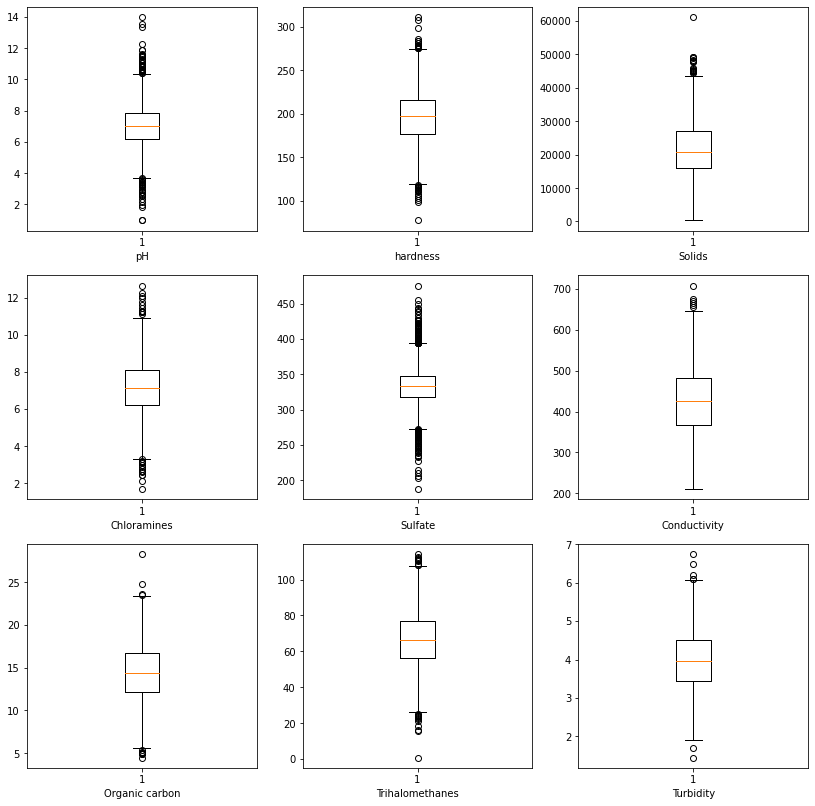

In [9]:
ph = imputed_df['ph']
hardness  = imputed_df['Hardness']
solids = imputed_df['Solids']
Chloramines = imputed_df['Chloramines']
Sulfate = imputed_df['Sulfate']
Conductivity = imputed_df['Conductivity']
Organic_carbon = imputed_df['Organic_carbon']
Trihalomethanes = imputed_df['Trihalomethanes']
Turbidity = imputed_df['Turbidity']


plt.rcParams["figure.figsize"] = [14, 14]

plt.subplot(3,3,1)
plt.boxplot(ph)
plt.xlabel('pH')

plt.subplot(3,3,2)
plt.boxplot(hardness)
plt.xlabel('hardness')

plt.subplot(3,3,3)
plt.boxplot(solids)
plt.xlabel('Solids')

plt.subplot(3,3,4)
plt.boxplot(Chloramines)
plt.xlabel('Chloramines')

plt.subplot(3,3,5)
plt.boxplot(Sulfate)
plt.xlabel('Sulfate')

plt.subplot(3,3,6)
plt.boxplot(Conductivity)
plt.xlabel('Conductivity')

plt.subplot(3,3,7)
plt.boxplot(Organic_carbon)
plt.xlabel('Organic carbon')

plt.subplot(3,3,8)
plt.boxplot(Trihalomethanes)
plt.xlabel('Trihalomethanes')

plt.subplot(3,3,9)
plt.boxplot(Turbidity)
plt.xlabel('Turbidity')

plt.show()

In [10]:
# plt.rcParams["figure.figsize"] = [5, 5]

# Q1 = ph.quantile(0.25)
# Q3 = ph.quantile(0.75)
# IQR = Q3-Q1
# upperlimit = Q3 + (IQR * 1.5)
# lowerlimit = Q1 - (IQR * 1.5)

# out1 = imputed_df[(imputed_df.ph > 1) & (imputed_df.ph <13)]
# plt.boxplot(out1['ph'])
# plt.show()

In [11]:
# imputed_df['ph'] = out1.ph
def removeph(df):
    temp = pd.DataFrame()
#     df_selling_price = df['Conductivity']
    Q1 = ph.quantile(0.25)
    Q3 = ph.quantile(0.75)
    IQR = Q3-Q1
    upperlimit = Q3 + (IQR * 1.5)
    lowerlimit = Q1 - (IQR * 1.5)

    out1 = imputed_df[(imputed_df.ph < lowerlimit) & (imputed_df.ph > upperlimit)]
    temp = pd.concat([temp,out1])
    return df.drop(temp.index)
df1 = removeph(imputed_df)

In [12]:
def removeSulfate(df):
    temp = pd.DataFrame()
    sQ1 = Sulfate.quantile(0.25)
    sQ3 = Sulfate.quantile(0.75)
    sIQR = sQ3-sQ1
    supperlimit = sQ3 + (sIQR * 1.5)
    slowerlimit = sQ1 - (sIQR * 1.5)

    out2 = imputed_df[(imputed_df.Sulfate < slowerlimit) & (imputed_df.Sulfate > supperlimit)]
    temp = pd.concat([temp,out2])
    return df.drop(temp.index)
df2 = removeSulfate(df1)
df2.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [13]:
# sQ1 = Sulfate.quantile(0.25)
# sQ3 = Sulfate.quantile(0.75)
# sIQR = Q3-Q1
# supperlimit = sQ3 + (sIQR * 1.5)
# slowerlimit = sQ1 - (sIQR * 1.5)

# out2 = imputed_df[(imputed_df.Sulfate > 200) & (imputed_df.Sulfate <450)]
# plt.boxplot(out2['Sulfate'])
# plt.show()

In [14]:
def removehardness(df):
    temp = pd.DataFrame()
    hQ1 = hardness.quantile(0.25)
    hQ3 = hardness.quantile(0.75)
    hIQR = hQ3-hQ1
    hupperlimit = hQ3 + (hIQR * 1.5)
    hlowerlimit = hQ1 - (hIQR * 1.5)

    out3 = imputed_df[(imputed_df.Hardness < hlowerlimit) & (imputed_df.Hardness > hupperlimit)]
    temp = pd.concat([temp,out3])
    return df.drop(temp.index)
df3 = removehardness(df2)
df3.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [15]:
# hQ1 = hardness.quantile(0.25)
# hQ3 = hardness.quantile(0.75)
# hIQR = hQ3-hQ1
# hupperlimit = hQ3 + (hIQR * 1.5)
# hlowerlimit = hQ1 - (hIQR * 1.5)

# out3 = imputed_df[(imputed_df.Hardness > 60) & (imputed_df.Hardness <320)]
# # out3.shape
# plt.boxplot(out3['Hardness'])
# plt.show()


In [16]:
def removeOrganic_carbon(df):
    temp = pd.DataFrame()
    oQ1 = Organic_carbon.quantile(0.25)
    oQ3 = Organic_carbon.quantile(0.75)
    oIQR = oQ3-oQ1
    oupperlimit =oQ3 + (oIQR * 1.5)
    olowerlimit = oQ1 - (oIQR * 1.5)

    out4 = imputed_df[(imputed_df.Organic_carbon < olowerlimit) & (imputed_df.Organic_carbon >oupperlimit)]
    temp = pd.concat([temp,out4])
    return df.drop(temp.index)
df4 = removeOrganic_carbon(df3)
df4.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [17]:
# oQ1 = Organic_carbon.quantile(0.25)
# oQ3 = Organic_carbon.quantile(0.75)
# oIQR = oQ3-oQ1
# oupperlimit =oQ3 + (oIQR * 1.5)
# olowerlimit = oQ1 - (oIQR * 1.5)

# out4 = imputed_df[(imputed_df.Organic_carbon > 3) & (imputed_df.Organic_carbon <25)]
# plt.boxplot(out4['Organic_carbon'])
# plt.show()

In [18]:
def removetrihalomethanes(df):
    temp = pd.DataFrame()
    tQ1 = Trihalomethanes.quantile(0.25)
    tQ3 = Trihalomethanes.quantile(0.75)
    tIQR = tQ3-tQ1
    tupperlimit = tQ3 + (tIQR * 1.5)
    tlowerlimit = tQ1 - (tIQR * 1.5)

    out5 = imputed_df[(imputed_df.Trihalomethanes < tlowerlimit) & (imputed_df.Trihalomethanes > tupperlimit)]
    temp = pd.concat([temp,out5])
    return df.drop(temp.index)
df5 = removeOrganic_carbon(df4)
df5.isna().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [19]:
# tQ1 = Trihalomethanes.quantile(0.25)
# tQ3 = Trihalomethanes.quantile(0.75)
# tIQR = tQ3-tQ1
# tupperlimit = tQ3 + (tIQR * 1.5)
# tlowerlimit = tQ1 - (tIQR * 1.5)

# out5 = imputed_df[(imputed_df.Trihalomethanes > 10) & (imputed_df.Trihalomethanes < 120)]
# plt.boxplot(out5['Trihalomethanes'])
# plt.show()

In [20]:
def removeConductivity(df):
    temp = pd.DataFrame()
#     df_selling_price = df['Conductivity']
    cQ1 = imputed_df.Conductivity.quantile(0.25)
    cQ3 = imputed_df.Conductivity.quantile(0.75)
    cIQR = cQ3-cQ1
    cupperlimit = cQ3 + (cIQR * 1.5)
    clowerlimit = cQ1 - (cIQR * 1.5)

    out6 = imputed_df[(imputed_df.Conductivity < clowerlimit) & (imputed_df.Conductivity > cupperlimit)]
    temp = pd.concat([temp,out6])
    return df.drop(temp.index)
df6 = removeConductivity(df5)
df6.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [21]:
# cQ1 = Conductivity.quantile(0.25)
# cQ3 = Conductivity.quantile(0.75)
# cIQR = cQ3-cQ1
# cupperlimit = cQ3 + (cIQR * 1.5)
# clowerlimit = cQ1 - (cIQR * 1.5)

# out6 = imputed_df[(imputed_df.Conductivity > clowerlimit) & (imputed_df.Conductivity < 700)]
# plt.boxplot(out6['Conductivity'])
# plt.show()

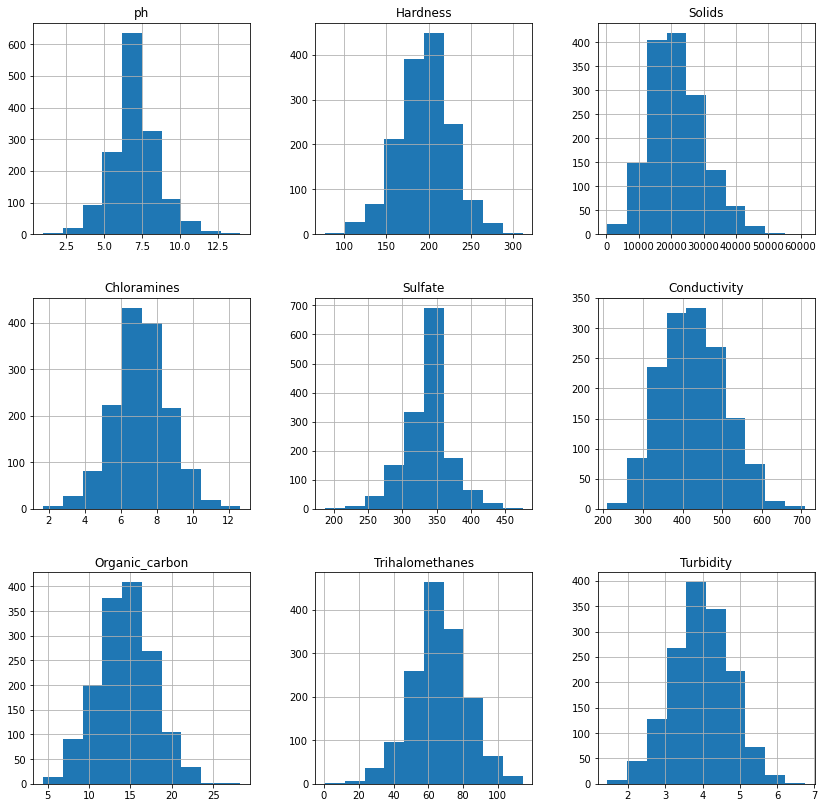

In [22]:
df6.hist(figsize=(14,14))
plt.show()

# Feature Scaling

In [23]:
# Feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()
numeric = scaler.fit_transform(df6)

feng_df = pd.DataFrame(numeric, columns = df6.columns)



# Model Training

In [64]:

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

x = df6
y = target_val

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state =5, stratify = y)

In [65]:
# Decision tree algorithm

Dtree = DecisionTreeClassifier(criterion='gini', max_depth = 5 )
tree = Dtree.fit(x_train, y_train)

In [ ]:
# LR = LogisticRegression()
# tree = LR.fit(x_train, y_train)
# model

# knn = KNeighborsClassifier(n_neighbors=7)
# knn.fit(x_train,y_train)
# tree = knn.fit(x_train, y_train)

In [25]:
ytr_pred =  tree.predict(x_train)

In [26]:
y_hat = tree.predict(x_test)

# Evaluation

In [27]:
report = classification_report(y_train, ytr_pred)
print("Report For train data : \n{}".format(report))

Report For train data : 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1022
           1       0.84      0.21      0.34       178

    accuracy                           0.88      1200
   macro avg       0.86      0.60      0.64      1200
weighted avg       0.87      0.88      0.84      1200



In [28]:
report = classification_report(y_test, y_hat)
print("Report For train data : \n{}".format(report))

Report For train data : 
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       256
           1       0.43      0.07      0.12        44

    accuracy                           0.85       300
   macro avg       0.64      0.53      0.52       300
weighted avg       0.80      0.85      0.80       300



# Pipeline

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import seaborn as sns 

In [47]:
# Datasplitting
cols = df6.columns

X = df6
Y = target_val

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=5 ,stratify=y)

In [48]:
transformer = Pipeline(steps=
                       [
                           ('imputeN',SimpleImputer(strategy='mean')),
                           ('scale',StandardScaler())
                       ])

In [49]:
preprocessing = ColumnTransformer(transformers=
                       [
                           ('numeric',transformer,cols),
    
                       ])

In [50]:
# from sklearn.neighbors import KNeighborsClassifier

# estimator = KNeighborsClassifier(n_neighbors=3)

In [51]:
from sklearn.tree import DecisionTreeClassifier
estimator  = DecisionTreeClassifier(criterion='gini', max_depth= 5)

In [52]:
mymodel = Pipeline(steps=
                  [
                      ('pre',preprocessing),
                      ('est',estimator)
                  ])

In [53]:
from sklearn import set_config
set_config(display='diagram')
mymodel.fit(X_train,Y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object'))])),
                ('est', DecisionTreeClassifier(max_depth=5))])

In [54]:
ytrain_pred = mymodel.predict(X_train) 

In [55]:
ytest_pred = mymodel.predict(X_test) 

In [56]:
report = classification_report(Y_train, ytrain_pred)
print("Report For train data : \n{}".format(report))

Report For train data : 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1022
           1       0.84      0.21      0.34       178

    accuracy                           0.88      1200
   macro avg       0.86      0.60      0.64      1200
weighted avg       0.87      0.88      0.84      1200



In [57]:
report = classification_report(Y_test, ytest_pred)
print("Report for test data: \n{}".format(report))


Report for test data: 
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       256
           1       0.43      0.07      0.12        44

    accuracy                           0.85       300
   macro avg       0.64      0.53      0.52       300
weighted avg       0.80      0.85      0.80       300



# Hyper-Tunning

In [58]:
from sklearn.model_selection import GridSearchCV

criterion = ['gini', 'entropy']
max_depth = [10,11,12,13,14,15,16,17,18]
splitter = ['best', 'random']
grid_params = [
  {
        "est__criterion":criterion,
        "est__max_depth":max_depth,
        "est__splitter": splitter,
  }
]

gs_dtree_pipeline = GridSearchCV(estimator=mymodel,
                               param_grid = grid_params,
                               scoring = 'accuracy',
                               cv = 10
                               )


In [59]:
gs_model = gs_dtree_pipeline.fit(X_train, Y_train)

In [66]:
gs_model.best_estimator_

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object'))])),
                ('est',
                 DecisionTreeClassifier(max_depth=10, splitter='random'))])

In [60]:
pre = gs_model.predict(X_test)

In [61]:
pre1 = gs_model.predict(X_train)

In [62]:
report = classification_report(Y_train, pre1)
print("Report for train Data : \n{}".format(report))

Report for train Data : 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1022
           1       0.98      0.29      0.45       178

    accuracy                           0.89      1200
   macro avg       0.94      0.65      0.70      1200
weighted avg       0.90      0.89      0.87      1200



In [63]:
report = classification_report(Y_test, pre)
print("Report for test Data : \n{}".format(report))

Report for test Data : 
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       256
           1       0.40      0.09      0.15        44

    accuracy                           0.85       300
   macro avg       0.63      0.53      0.53       300
weighted avg       0.79      0.85      0.80       300



In [72]:
import pickle
pickle.dump(gs_model.best_estimator_,open("potability_prediction.pkl",'wb')) 

In [73]:
gsmodel1 = pickle.load(open("potability_prediction.pkl",'rb'))